In [52]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

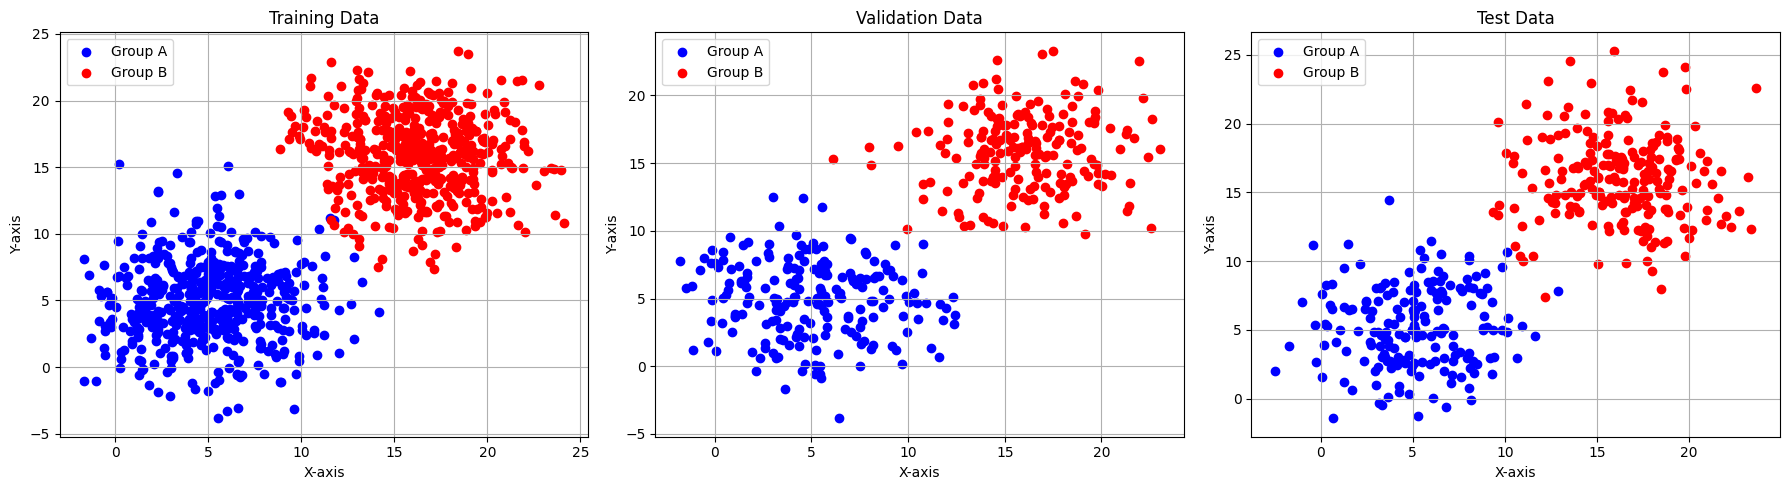

Training set shape: (400, 2)


In [53]:


def plot_datasets_subplots(X_train, Y_train, X_val, Y_val, X_test, Y_test):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    def scatter_plot(ax, X, Y, title):
        group_a = X[Y == 1]
        group_b = X[Y == 0]
        ax.scatter(group_a[:, 0], group_a[:, 1], color='blue', label='Group A')
        ax.scatter(group_b[:, 0], group_b[:, 1], color='red', label='Group B')
        ax.set_title(title)
        ax.set_xlabel("X-axis")
        ax.set_ylabel("Y-axis")
        ax.legend()
        ax.grid(True)

    scatter_plot(axs[0], X_train, Y_train, "Training Data")
    scatter_plot(axs[1], X_val, Y_val, "Validation Data")
    scatter_plot(axs[2], X_test, Y_test, "Test Data")

    plt.tight_layout()
    plt.show()

# Parameters
N_train = 500
N_test = 200
N_val = 200  # Validation set size
mean_a, mean_b = 5, 16

# Raw data (total = N_train*2 + N_val*2 + N_test*2 = 1800 samples)
total_per_class = N_train + N_val + N_test

# Generate raw data per class
group_a = [[rd.gauss(mean_a, 3), rd.gauss(mean_a, 3)] for _ in range(total_per_class)]
group_b = [[rd.gauss(mean_b, 3), rd.gauss(mean_b, 3)] for _ in range(total_per_class)]

X_raw_data = np.array(group_a + group_b)
Y_raw_data = np.array([1] * total_per_class + [0] * total_per_class)

# Shuffle the dataset (optional but recommended before splitting)
indices = np.arange(len(X_raw_data))
np.random.shuffle(indices)
X_raw_data = X_raw_data[indices]
Y_raw_data = Y_raw_data[indices]

# Manual split (total = 1800: 1000 train, 400 val, 400 test)
train_size = 2 * N_train
val_size = 2 * N_val
test_size = 2 * N_test

X_train = X_raw_data[:train_size]
Y_train = Y_raw_data[:train_size]

X_val = X_raw_data[train_size:train_size + val_size]
Y_val = Y_raw_data[train_size:train_size + val_size]


X_test = X_raw_data[train_size + val_size:]
Y_test = Y_raw_data[train_size + val_size:]

# Call the function after preparing and normalizing your data
plot_datasets_subplots(X_train, Y_train, X_val, Y_val, X_test, Y_test)

# Normalization based on train set
min_val = np.min(X_raw_data)
max_val = np.max(X_raw_data)

X_train = (X_train - min_val) / (max_val - min_val)
X_val = (X_val - min_val) / (max_val - min_val)
X_test = (X_test - min_val) / (max_val - min_val)





# In case you would like to have to neuron as output
Y_train = to_categorical(Y_train, num_classes=2)
Y_val = to_categorical(Y_val, num_classes=2)
Y_test = to_categorical(Y_test, num_classes=2)

print("Training set shape:", Y_test.shape)


In [54]:
modele = Sequential()

p = 2
# Première couche : p neurones (entrée de dimension 2)
modele.add(Dense(p, input_dim=2, activation="sigmoid"))


# Choix de la méthode de descente de gradient
modele.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
print(modele.summary())


### Partie C - Calcul des poids par descente de gradient
modele.fit(X_train, Y_train, batch_size=20, epochs=50)


### Partie D - Résultats
resultat = modele.evaluate(X_val, Y_val, verbose=0)
print("Valeur de l'erreur sur les données de test (loss):", resultat[0])
print("Précision sur les données de test (accuracy):", resultat[1])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4985 - loss: 0.6232
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5091 - loss: 0.5984
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5585 - loss: 0.5925
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6664 - loss: 0.5763
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7703 - loss: 0.5610
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8322 - loss: 0.5573
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8912 - loss: 0.5480
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9296 - loss: 0.5402
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9360 - loss: 0.5303
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9459 - loss: 0.5223
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9539 - loss: 0.5160
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9624

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Probabilités prédites sur les données de test: (400, 2)
Poids du modèle: [array([[ 1.5931938, -0.8503099],
       [ 1.4016892, -1.4407351]], dtype=float32), array([-1.2328036,  1.2328035], dtype=float32)]
Poids w11: 1.5931938 w12: 1.4016892 b1: -1.2328036
Poids w21: -0.8503099 w22: -1.4407351 b2: 1.2328035


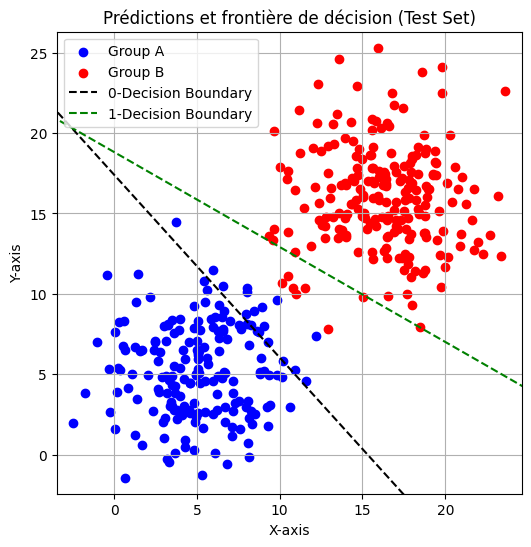

In [55]:
# --- Partie E - Prédictions ---

# Prédictions sur X_test (normalisé)
Y_predict_proba = modele.predict(X_test)

print("Probabilités prédites sur les données de test:", Y_predict_proba.shape)
Y_predict = [0 if y[0] >= y[1] else 1 for y in Y_predict_proba]
# print("Prédictions sur les données de test:", Y_predict)

# Dénormalisation de X_val pour affichage
X_test_denorm = (X_test * (max_val - min_val)) + min_val

# Tracé des points prédits
plt.figure(figsize=(6, 6))
blue = []
red = []
for i in range(len(X_test_denorm)):
    if Y_predict[i] == 1:
        blue.append((X_test_denorm[i][0], X_test_denorm[i][1]))
    else:
        red.append((X_test_denorm[i][0], X_test_denorm[i][1]))

blue = np.array(blue)
red = np.array(red)

if len(blue) > 0:
    plt.scatter(blue[:, 0], blue[:, 1], color='blue', label='Group A')
if len(red) > 0:
    plt.scatter(red[:, 0], red[:, 1], color='red', label='Group B')

# --- Tracé de la frontière de décision (linéaire) ---
weights = modele.get_weights()
print("Poids du modèle:", weights)
w11, w12 = weights[0][0][0], weights[0][1][0]
w21, w22 = weights[0][0][1], weights[0][1][1]
b1, b2 = weights[1][0], weights[1][1]

print("Poids w11:", w11, "w12:", w12, "b1:", b1)
print("Poids w21:", w21, "w22:", w22, "b2:", b2)

# Calcul de la frontière de décision dans l'espace normalisé
x_vals_norm = np.linspace(0, 1, 100)
y_vals_norm_1 = -(w11 / w12) * x_vals_norm - b1 / w12
y_vals_norm_2 = -(w21 / w22) * x_vals_norm - b2 / w22  

# Dénormalisation
x_vals = x_vals_norm * (max_val - min_val) + min_val
y_vals_1 = y_vals_norm_1 * (max_val - min_val) + min_val
y_vals_2 = y_vals_norm_2 * (max_val - min_val) + min_val

# Limites du graphique basées sur les données
x_min, x_max = np.min(X_test_denorm[:, 0]), np.max(X_test_denorm[:, 0])
y_min, y_max = np.min(X_test_denorm[:, 1]), np.max(X_test_denorm[:, 1])
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# Tracé de la frontière
plt.plot(x_vals, y_vals_1, color="black", linestyle="--", label="0-Decision Boundary")
plt.plot(x_vals, y_vals_2, color="green", linestyle="--", label="1-Decision Boundary")

plt.title("Prédictions et frontière de décision (Test Set)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()
